<a href="https://colab.research.google.com/github/abhijithv7/BANK_LOAN/blob/master/Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.



## Importing all required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling (1).xlsx


In [3]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", "Data")

In [4]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
df.shape

(5000, 14)

We have 14 columns, in which 5 of them i.e. Personal Loan, Securities Account, CD Account, Online and CreditCard belongs to *binary category*.

The variables Family and Education belongs to *ordinary category*.

Age, Experience, Income, CCAvg, Mortage are *interval variabes*.

ID and ZIP Code are *nominal variables*.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
df.apply(lambda a : sum(a.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No null values in any of the columns

In [11]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Finding unique values

In [12]:
df.apply(lambda a: len(a.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

## Cleaning Data

In [13]:
df[df['Experience'] < 0]['Experience'].count()

52

In [14]:
df.drop(["Experience","ID"], axis=1)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


In [15]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [16]:
df.drop("ZIP Code", axis=1)

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


In [17]:
(df.Mortgage==0).sum()
# 3462 people out of 5000 have 0 Mortgage

3462

In [18]:
(df.CCAvg==0).sum()
# 106 people have 0 average credit card spending

106

Categorical Columns

In [19]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [20]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [21]:
df["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [22]:
df["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [23]:
df["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [24]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

# Univariate analysis

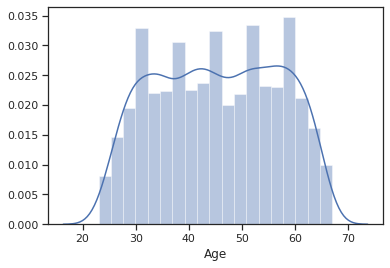

In [25]:
sns.distplot(df.Age)
# Age is normally distributed all over

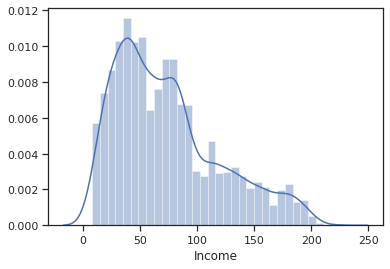

In [26]:
sns.distplot(df.Income)
# Right Skewed

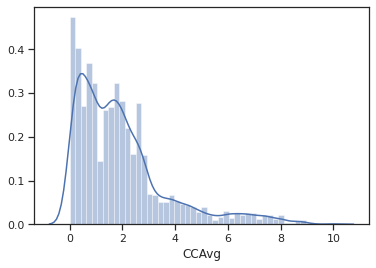

In [27]:
sns.distplot(df.CCAvg)
# Right Skewed

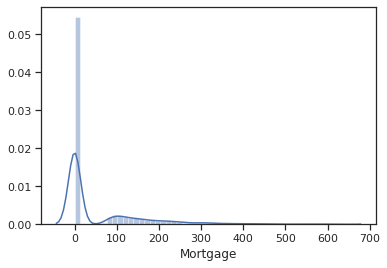

In [28]:
sns.distplot(df.Mortgage)
# Right Skewed

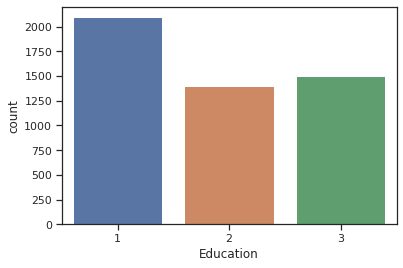

In [29]:
sns.countplot(df.Education)
# people belonging to level1 education is higher 

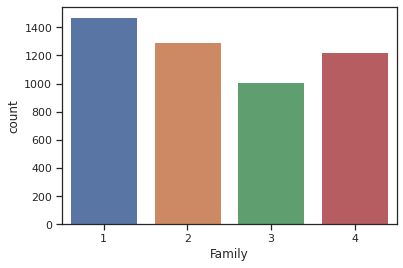

In [30]:
sns.countplot(df.Family)

# Multivariate Analysis

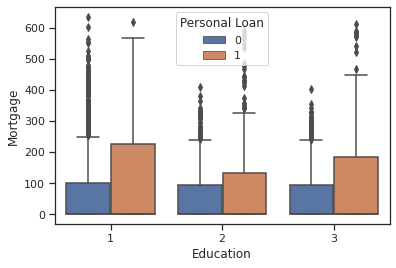

In [31]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

High Mortage

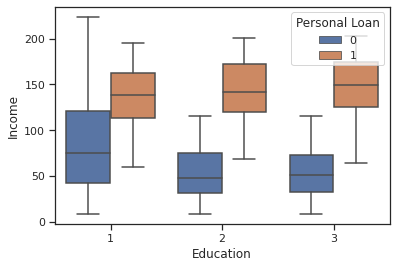

In [32]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

Education level 1 have high income.
Customers who have taken loan have same kind of income.

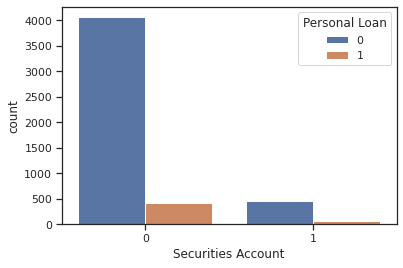

In [33]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

Major part of customers who does not have a loan have security accounts.

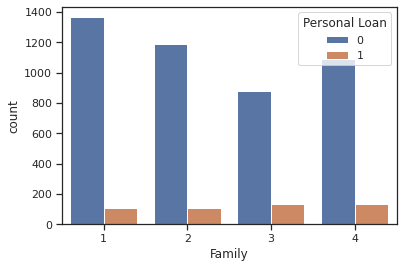

In [34]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

Family of size 3 have higher probability of taking loan.

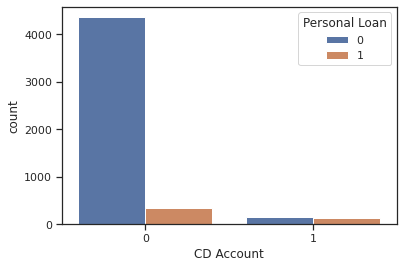

In [35]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

All who does not have a CD Account does not have loan.
Almost all who have CD Account have a loan as well.

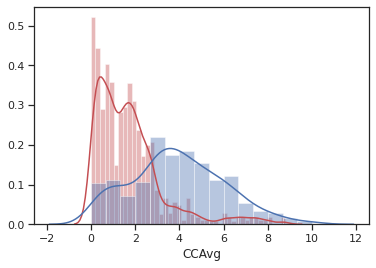

In [36]:
sns.distplot( df[df["Personal Loan"]==0]['CCAvg'], color = 'r')
sns.distplot( df[df["Personal Loan"]==1]['CCAvg'], color = 'b')

The person who have loan have higher credit card average. 

Text(0, 0.5, 'Age')

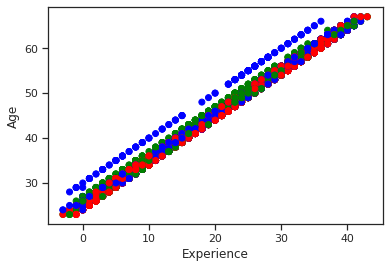

In [37]:
fig, ax = plt.subplots()
colors = {1:'red',2:'green',3:'blue'}
ax.scatter(df['Experience'],df['Age'],c=df['Education'].apply(lambda a:colors[a]))
plt.xlabel('Experience')
plt.ylabel('Age')

Age and Experience have positive correlation. With increase in Experience, Age also increases. Different colors show different education levels.

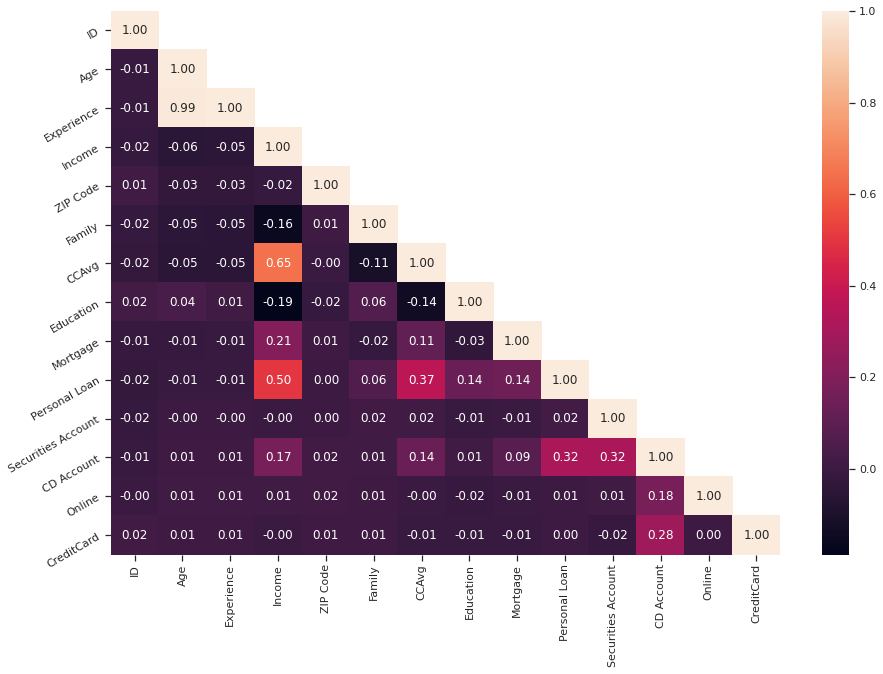

In [38]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(15,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Age and Experience is highly correlated (0.99)
CCAvg(credit card average) and Income are moderately correlated (0.65)

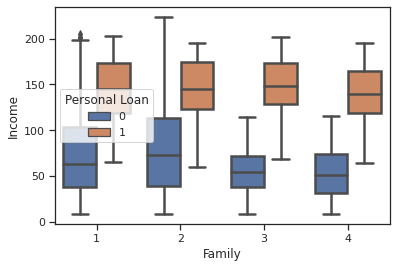

In [39]:
sns.boxplot(x=df.Family,y=df.Income,hue=df["Personal Loan"])

Families with less income than 100,000 are less likely to take loan.
Families with higher income are more likely to take a loan.

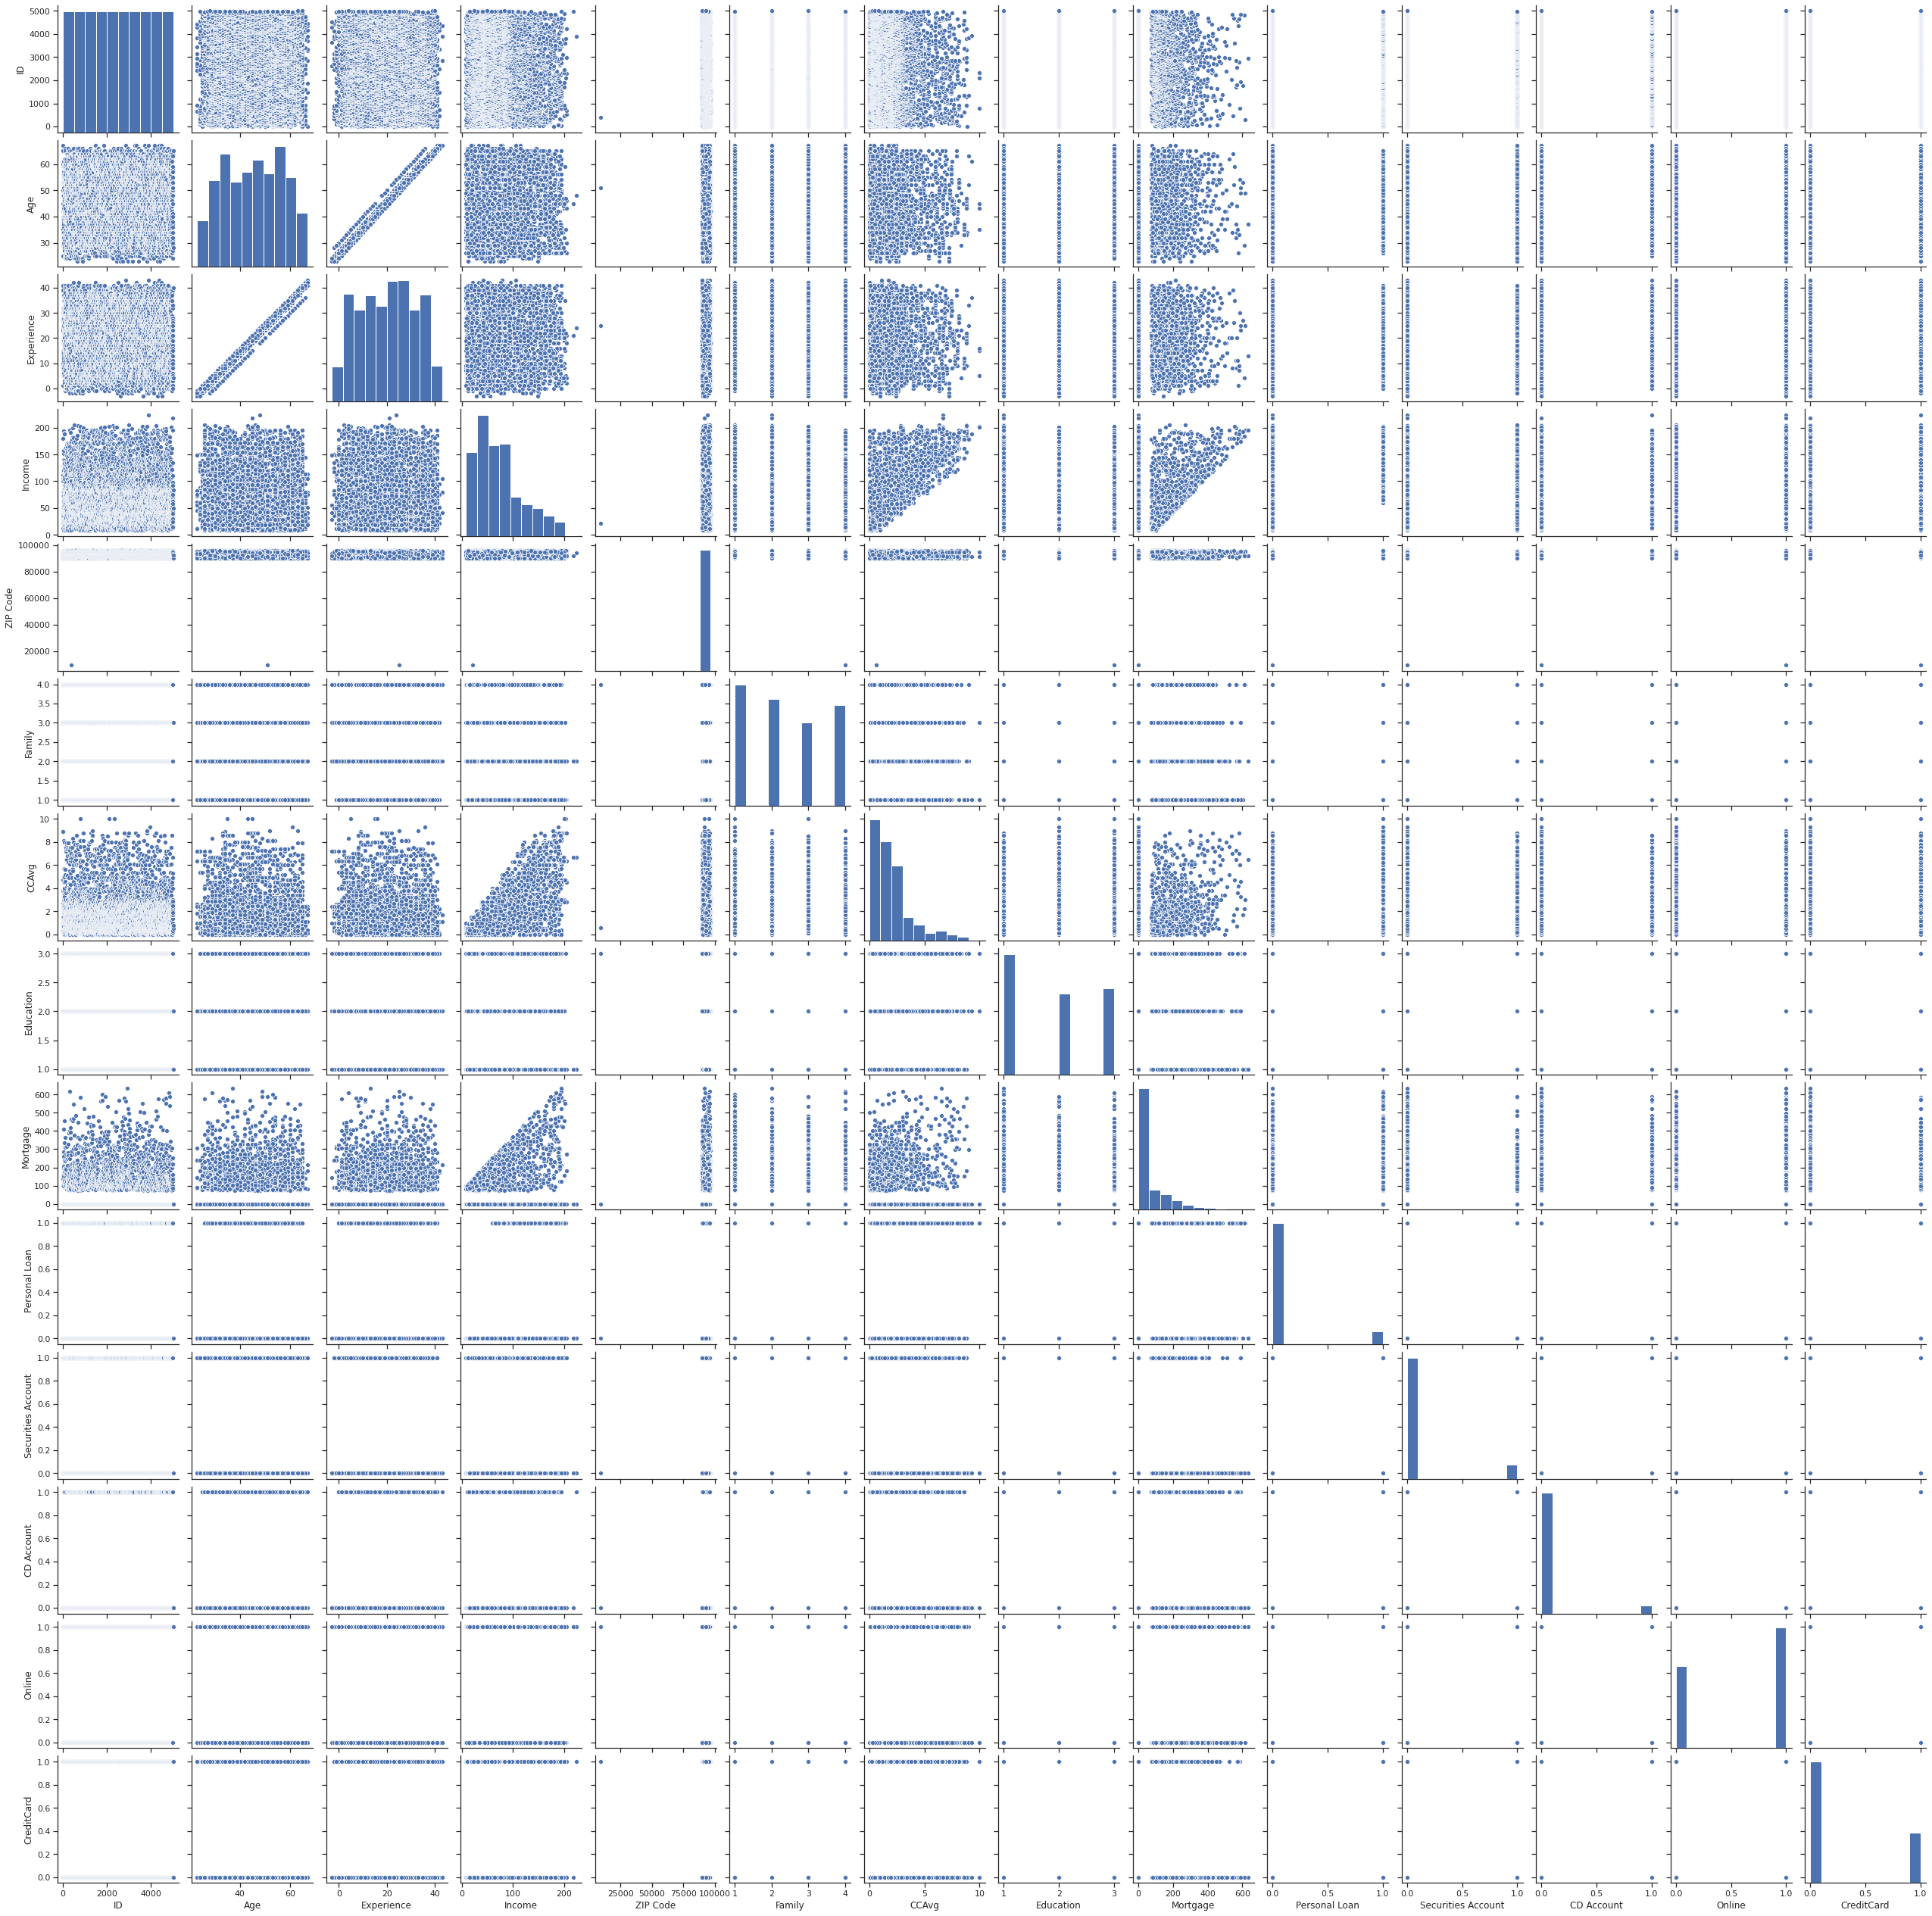

In [40]:
sns.pairplot(df)

In [41]:
data_Y=df[["Personal Loan"]]

In [42]:
data_X=df.loc[:,df.columns!="Personal Loan"]

# Transformations of features

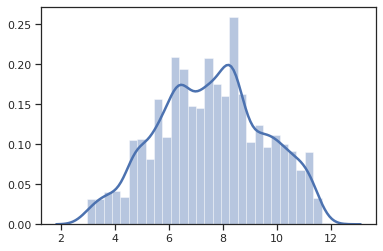

In [43]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
temp=pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(temp)
# became a normal distribution

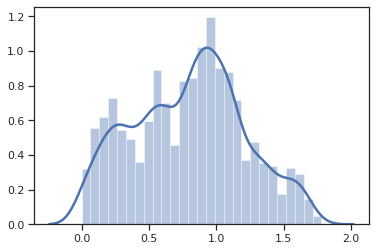

In [44]:
pt=PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
temp=pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(temp)
# became a normal distribution

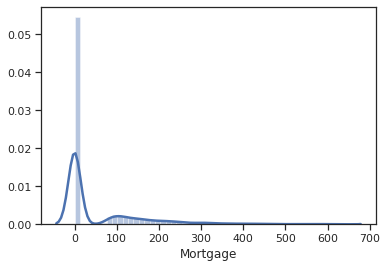

In [45]:
sns.distplot(df.Mortgage)
# it is highly skewed as most of the variable are 0

In [46]:
data_X["Mortgage_Int"]=pd.cut(data_X["Mortgage"], bins=[0,100,200,300,400,500,600,700], labels=[0,1,2,3,4,5,6], include_lowest=True)
data_X.drop("Mortgage",axis=1, inplace=True)

In [47]:
data_X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,1,25,1,49,91107,4,1.6,1,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,1,0


## Splitting Dataset into Train-Test Data

In [48]:
from sklearn.model_selection import train_test_split
train, test, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3 ,stratify=data_Y, random_state=200)

## Logistic Regression

In [56]:
clf = LogisticRegression()
clf.fit(train,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_predict = clf.predict(test)

In [58]:
y_predict[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
test_y[:10]

,Personal Loan
234,0
2452,0
4027,0
2917,0
819,0
4138,0
1849,0
4144,0
1782,0
4978,0


In [60]:
from sklearn import metrics
cnf_matrix= metrics.confusion_matrix(test_y, y_predict)

In [61]:
cnf_matrix

array([[1316,   40],
       [  98,   46]])

In [62]:
print("TEST Accuracy:",metrics.accuracy_score(test_y, y_predict))
print("Precision:",metrics.precision_score(test_y, y_predict))
print("Recall:",metrics.recall_score(test_y, y_predict))
print("TRAIN Accuracy:",metrics.accuracy_score(train_y, clf.predict(train)))

TEST Accuracy: 0.908
Precision: 0.5348837209302325
Recall: 0.3194444444444444
TRAIN Accuracy: 0.9068571428571428


# **ACCURACY = 90.8%**

## Decision Tree Classifier

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [64]:
dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
dt_model.score(test , test_y)

0.978

In [66]:
y_predict = dt_model.predict(test)

In [67]:
y_predict[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
test_y[:10]

,Personal Loan
234,0
2452,0
4027,0
2917,0
819,0
4138,0
1849,0
4144,0
1782,0
4978,0


In [69]:
print("TEST Accuracy: ",metrics.accuracy_score(test_y,y_predict))
print("Precision:",metrics.precision_score(test_y, y_predict))
print("Recall:",metrics.recall_score(test_y, y_predict))
print("TRAIN Accuracy: ",metrics.accuracy_score(train_y,dt_model.predict(train)))
print("Confusion Matrix: \n",metrics.confusion_matrix(test_y, y_predict))

TEST Accuracy:  0.978
Precision: 0.9111111111111111
Recall: 0.8541666666666666
TRAIN Accuracy:  0.9774285714285714
Confusion Matrix: 
 [[1344   12]
 [  21  123]]


# **ACCURACY = 97.8%**

## Naive Bayes

In [70]:
naive_model = GaussianNB()
naive_model.fit(train, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
prediction = naive_model.predict(test)

In [72]:
prediction[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [73]:
test_y[:10]

,Personal Loan
234,0
2452,0
4027,0
2917,0
819,0
4138,0
1849,0
4144,0
1782,0
4978,0


In [74]:
naive_model.score(test,test_y)

0.8826666666666667

In [75]:
print("TEST Accuracy: ",metrics.accuracy_score(test_y,prediction))
print("Precision:",metrics.precision_score(test_y, prediction))
print("Recall:",metrics.recall_score(test_y, prediction))
print("TRAIN Accuracy: ",metrics.accuracy_score(train_y,naive_model.predict(train)))
print("Confusion Matrix: \n",metrics.confusion_matrix(test_y, prediction))

TEST Accuracy:  0.8826666666666667
Precision: 0.4252336448598131
Recall: 0.6319444444444444
TRAIN Accuracy:  0.882
Confusion Matrix: 
 [[1233  123]
 [  53   91]]


# **ACCURACY = 88.2%**

## Random Forest Classifier

In [76]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

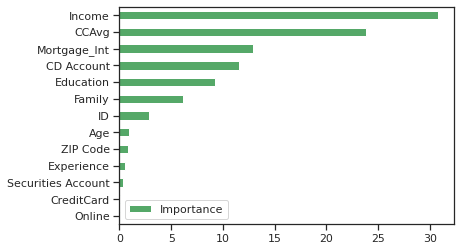

In [77]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='g' )

In [78]:
predicted_random=randomforest_model.predict(test)

In [79]:
predicted_random[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
randomforest_model.score(test,test_y)

0.9113333333333333

In [81]:
print("TEST Accuracy: ",metrics.accuracy_score(test_y,predicted_random))
print("Precision:",metrics.precision_score(test_y, predicted_random))
print("Recall:",metrics.recall_score(test_y, predicted_random))
print("TRAIN Accuracy: ",metrics.accuracy_score(train_y,randomforest_model.predict(train)))
print("Confusion Matrix: \n",metrics.confusion_matrix(test_y, predicted_random))

TEST Accuracy:  0.9113333333333333
Precision: 1.0
Recall: 0.0763888888888889
TRAIN Accuracy:  0.9111428571428571
Confusion Matrix: 
 [[1356    0]
 [ 133   11]]


# **ACCURACY = 91.1%**

## KNN

In [82]:
x_train_set = df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
y_train_set = df["Personal Loan"]
X = np.array(x_train_set)
Y = np.array(y_train_set)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [83]:
X_Train.shape

(3500, 11)

In [84]:
X_Test.shape

(1499, 11)

In [85]:
knn = KNeighborsClassifier(n_neighbors= 11 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)

In [86]:
predicted[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [87]:
Y_Test[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [88]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)

In [89]:
print("TEST Accuracy: ", acc)
print("Precision:",metrics.precision_score(Y_Test, predicted))
print("Recall:",metrics.recall_score(Y_Test, predicted))
print("TRAIN Accuracy: ", accuracy_score(Y_Train, knn.predict(X_Train)))
print("Confusion Matrix: \n",metrics.confusion_matrix(Y_Test, predicted))

TEST Accuracy:  0.9066044029352902
Precision: 0.3157894736842105
Recall: 0.09523809523809523
TRAIN Accuracy:  0.9085714285714286
Confusion Matrix: 
 [[1347   26]
 [ 114   12]]


# **ACCURACY = 90.6%**

## Model Comparison

In [90]:
X=df.drop(['Personal Loan','Experience','ID'],axis=1)
y=df.pop('Personal Loan')

In [91]:
models = []

In [92]:
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [93]:
results = []
names = []
scoring = 'accuracy'

In [94]:
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

KNN: 0.898600 (0.008902)
CART: 0.981600 (0.004176)
NB: 0.885600 (0.010385)
RF: 0.986800 (0.003250)


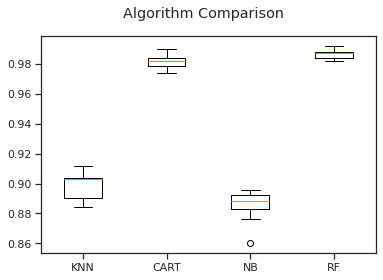

In [95]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Five classification algorithms were used in this study. It seems like Decision Tree algorithm have the highest accuracy and we can choose that as our final model.